<a href="https://colab.research.google.com/github/ankit0108/A-Coffee-please-/blob/master/ML_model_rooftop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_path = next(iter(uploaded))
extract_dir = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Saving New folder (4).zip to New folder (4).zip


In [ ]:
!pip install -q segmentation-models-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.7 MB/s eta 0:00:00


## Roof Segmentation Model (Stage 1)

This model is trained to segment the entire roof area from aerial imagery using a U-Net architecture with a pretrained ResNet34 encoder.

- **Objective**: Predict a binary mask highlighting the full roof structure
- **Architecture**: U-Net with `resnet34` backbone (`smp.Unet`)
- **Input size**: 256×256 RGB images
- **Loss Function**: Tversky Loss (α=0.3, β=0.7) — balances false positives and false negatives
- **Dataset**: LabelMe annotations mapped to the 'roof' class
- **Augmentation**: Random flips, rotations, affine transforms, jitter, blur, noise
- **Output**: Binary mask (1 = roof, 0 = background)

This model serves as the foundation and ensures the main roof area is accurately identified.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 001 | Train Loss: 0.5082 | Val Loss: 0.5005 | Val IoU: 0.6907
Epoch 002 | Train Loss: 0.4908 | Val Loss: 0.4901 | Val IoU: 0.6450
Epoch 003 | Train Loss: 0.4862 | Val Loss: 0.4859 | Val IoU: 0.7691
Epoch 004 | Train Loss: 0.4841 | Val Loss: 0.4841 | Val IoU: 0.7117
Epoch 005 | Train Loss: 0.4776 | Val Loss: 0.4833 | Val IoU: 0.7059
Epoch 006 | Train Loss: 0.4807 | Val Loss: 0.4821 | Val IoU: 0.7618
Epoch 007 | Train Loss: 0.4818 | Val Loss: 0.4826 | Val IoU: 0.6787
Epoch 008 | Train Loss: 0.4779 | Val Loss: 0.4788 | Val IoU: 0.7504
Epoch 009 | Train Loss: 0.4775 | Val Loss: 0.4820 | Val IoU: 0.8084
Epoch 010 | Train Loss: 0.4764 | Val Loss: 0.4804 | Val IoU: 0.7173
Epoch 011 | Train Loss: 0.4745 | Val Loss: 0.4793 | Val IoU: 0.7583
Epoch 012 | Train Loss: 0.4760 | Val Loss: 0.4770 | Val IoU: 0.8282
Epoch 013 | Train Loss: 0.4759 | Val Loss: 0.4843 | Val IoU: 0.7979
Epoch 014 | Train Loss: 0.4744 | Val Loss: 0.4785 | Val IoU: 0.7302
Epoch 015 | Train Loss: 0.4728 | Val Loss: 0.480

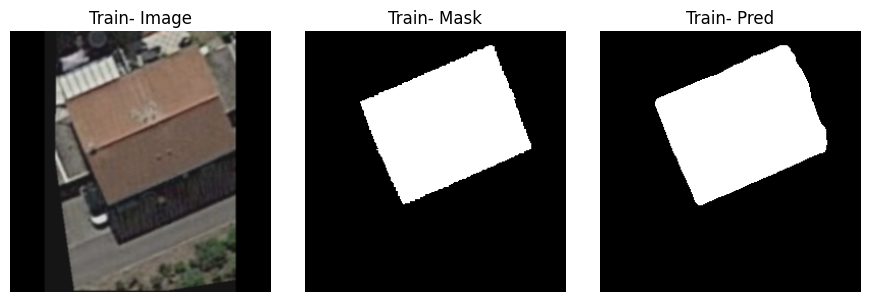

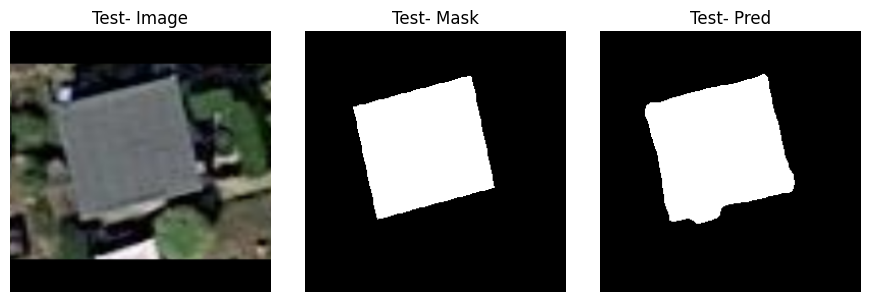

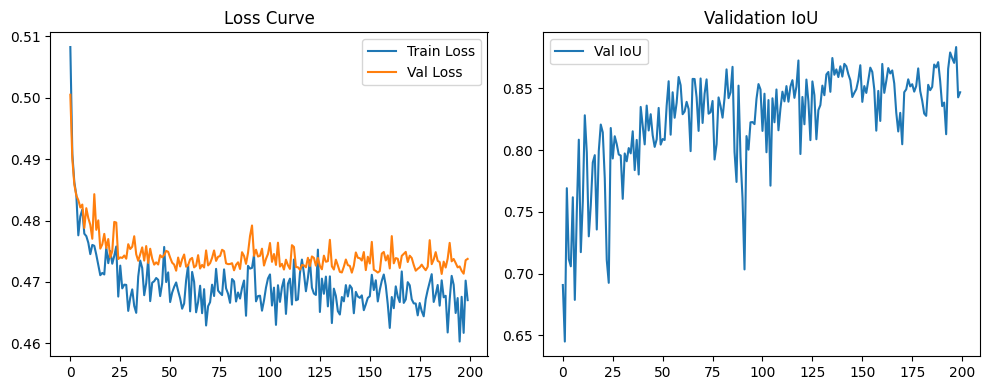

In [ ]:
# U-Net with pretrained ResNet34 encoder for roof segmentation
# Requires: pip install segmentation-models-pytorch

import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.transforms import functional as TF, InterpolationMode
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import TverskyLoss

# Reproducibility & Device
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Constants
TARGET_SIZE = (256, 256)
BATCH_SIZE = 4
NUM_EPOCHS = 200
PATIENCE = 150

# Helper: pad image to square
def pad_to_square_pil(img, fill=0):
    w, h = img.size
    m = max(w, h)
    pad_left = (m - w) // 2
    pad_top = (m - h) // 2
    pad_right = m - w - pad_left
    pad_bottom = m - h - pad_top
    return TF.pad(img, (pad_left, pad_top, pad_right, pad_bottom), fill=fill)

# Dataset class
class RoofDataset(Dataset):
    def __init__(self, folders, augment=False):
        self.folders = folders
        self.augment = augment
        self.label_mapping = {
            '_background_': 'background', 'roof': 'roof',
            'roofline': 'roof_line', 'roof line': 'roof_line',
            'vent': 'vent', 'vents': 'vent', "vents'": 'vent',
            'window': 'window', 'chimney': 'chimney',
            'bend': 'bend', 'wall': 'wall'
        }
        self.roof_labels = {'roof', 'roof_line', 'chimney', 'vent', 'bend'}
        self.jitter = transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25)

    def normalize_labels(self, labels):
        return [self.label_mapping.get(lbl.strip().lower(), 'other') for lbl in labels]

    def _augment_pair(self, img, msk):
        if random.random() < 0.5:
            img, msk = TF.hflip(img), TF.hflip(msk)
        if random.random() < 0.5:
            img, msk = TF.vflip(img), TF.vflip(msk)
        angle = random.uniform(-15, 15)
        img = TF.rotate(img, angle, interpolation=InterpolationMode.BILINEAR)
        msk = TF.rotate(msk, angle, interpolation=InterpolationMode.NEAREST)
        scale = random.uniform(0.9, 1.1)
        shear = random.uniform(-5, 5)
        tx = int(0.10 * img.width * random.uniform(-1, 1))
        ty = int(0.10 * img.height * random.uniform(-1, 1))
        img = TF.affine(img, 0, (tx, ty), scale, shear, InterpolationMode.BILINEAR, fill=0)
        msk = TF.affine(msk, 0, (tx, ty), scale, shear, InterpolationMode.NEAREST, fill=0)
        if random.random() < 0.3:
            img = TF.gaussian_blur(img, kernel_size=3)
        if random.random() < 0.3:
            arr = np.array(img)
            noise = np.random.normal(0, 5, arr.shape).astype(np.int16)
            arr = np.clip(arr.astype(np.int16) + noise, 0, 255).astype(np.uint8)
            img = Image.fromarray(arr)
        img = self.jitter(img)
        return img, msk

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        folder = self.folders[idx]
        img = Image.open(os.path.join(folder, 'img.png')).convert('RGB')
        msk = Image.open(os.path.join(folder, 'label.png')).convert('L')
        labels_file = os.path.join(folder, 'label_names.txt')
        labels = self.normalize_labels(open(labels_file).read().splitlines()) if os.path.exists(labels_file) else ['background']
        is_roof = any(lbl in self.roof_labels for lbl in labels)
        if self.augment:
            img, msk = self._augment_pair(img, msk)
        img = pad_to_square_pil(img, fill=0)
        msk = pad_to_square_pil(msk, fill=0)
        img = TF.resize(img, TARGET_SIZE, interpolation=InterpolationMode.BILINEAR)
        msk = TF.resize(msk, TARGET_SIZE, interpolation=InterpolationMode.NEAREST)
        img = TF.to_tensor(img)
        msk = TF.to_tensor(msk)
        msk = (msk > 0.1).float() if is_roof else torch.zeros_like(msk)
        return img, msk

@torch.no_grad()
def compute_iou(pred, targ, thresh=0.5):
    pred = (pred > thresh).float()
    inter = (pred * targ).sum((1,2,3))
    union = ((pred + targ) >= 1).float().sum((1,2,3))
    return ((inter + 1e-6) / (union + 1e-6)).mean().item()

# Paths
root_dir = "./dataset/New folder (4)"
all_folders = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]
random.shuffle(all_folders)
n = len(all_folders)
train_f, val_f, test_f = np.split(all_folders, [int(.7*n), int(.85*n)])

train_ds = RoofDataset(train_f, augment=True)
val_ds = RoofDataset(val_f, augment=False)
test_ds = RoofDataset(test_f, augment=False)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# Model and training setup
model = smp.Unet("resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation="sigmoid").to(device)

class FocalDiceLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.focal = smp.losses.FocalLoss('binary', gamma=2)
        self.dice  = smp.losses.DiceLoss(mode='binary')
    def forward(self, preds, targets):
        return self.focal(preds, targets) + self.dice(preds, targets)

loss_fn = TverskyLoss(mode='binary', alpha=0.3, beta=0.7)
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

best_iou = 0.0
epochs_no_improve = 0
history = {'train_loss': [], 'val_loss': [], 'val_iou': []}
start_epoch = 1

# Checkpoint resume logic
checkpoint_path = 'checkpoint_256.pth'
if os.path.exists(checkpoint_path):
    try:
        checkpoint = torch.load(checkpoint_path, weights_only=False)
        # Evaluate on train and test sets only if model exists


        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        best_iou = checkpoint['best_iou']
        history = checkpoint['history']
        start_epoch = checkpoint['epoch'] + 1
        print(f"Resuming training from epoch {start_epoch}")
    except Exception as e:
        print(f"Failed to load checkpoint. Starting fresh. Reason: {e}")

# Training loop
for epoch in range(start_epoch, NUM_EPOCHS+1):
    model.train()
    tloss = 0
    for imgs, masks in train_loader:
        imgs, masks = imgs.to(device), masks.to(device)
        preds = model(imgs)
        loss = loss_fn(preds, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
    tloss /= len(train_loader)

    model.eval()
    vloss, ious = 0, []
    with torch.no_grad():
        for imgs, masks in val_loader:
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            vloss += loss_fn(preds, masks).item()
            ious.append(compute_iou(preds, masks))
    vloss /= len(val_loader)
    viou = np.mean(ious)
    scheduler.step(vloss)

    history['train_loss'].append(tloss)
    history['val_loss'].append(vloss)
    history['val_iou'].append(viou)

    print(f"Epoch {epoch:03d} | Train Loss: {tloss:.4f} | Val Loss: {vloss:.4f} | Val IoU: {viou:.4f}")

    if viou > best_iou + 1e-4:
        best_iou = viou
        epochs_no_improve = 0
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_iou': best_iou,
            'history': history
        }, checkpoint_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print(f"Early stopping at epoch {epoch}. Best IoU: {best_iou:.4f}")
            break

# Evaluate on train and test sets

def evaluate(loader, name):
    ious = []
    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            ious.append(compute_iou(preds, masks))
    print(f"{name} IoU: {np.mean(ious):.4f}")

if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
else:
    print(f"Model file '{checkpoint_path}' not found. Evaluation skipped.")

evaluate(train_loader, 'Train')
evaluate(test_loader, 'Test')

# Show sample predictions
def show_sample(loader, title):
    imgs, masks = next(iter(loader))
    imgs, masks = imgs.to(device), masks.to(device)
    with torch.no_grad(): preds = model(imgs)
    img  = imgs[0].cpu().permute(1,2,0)
    msk  = masks[0,0].cpu()
    prd  = (preds[0,0] > 0.5).float().cpu()
    plt.figure(figsize=(9,3))
    for i, (src, lbl) in enumerate(zip([img, msk, prd], ['Image', 'Mask', 'Pred'])):
        plt.subplot(1,3,i+1)
        plt.imshow(src, cmap='gray' if i>0 else None)
        plt.title(f"{title} {lbl}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample(train_loader, 'Train-')
show_sample(test_loader,  'Test-')

# Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'],   label='Val Loss')
plt.legend(); plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['val_iou'], label='Val IoU')
plt.legend(); plt.title('Validation IoU')
plt.tight_layout(); plt.show()

## Obstruction Detection Model (Stage 2)

This model is trained to detect small roof-top obstructions such as **chimneys**, **vents**, and **bends** from aerial imagery. It is the second stage in the two-model pipeline, following the full-roof segmentation model.

### Objective
To generate a binary mask that highlights only the **obstruction regions** on a roof — helping estimate usable rooftop area for solar panels.

### Architecture
- **Model**: U-Net
- **Encoder**: `resnet34` pretrained on ImageNet
- **Input**: 256×256 RGB tiles
- **Output**: Binary mask where 1 = obstruction, 0 = background

### Key Features
- **Mask Filtering**: Labels are filtered to only include pixels with grayscale values between **0.05 and 0.2**, which correspond to small features like vents and chimneys.
- **Loss Function**: Tversky Loss (α = 0.3, β = 0.7) to penalize false negatives and handle class imbalance
- **Augmentation**: Random flips, rotations, brightness/contrast jitter, Gaussian blur, and affine transformations

### Dataset
- Derived from LabelMe JSONs
- Classes used: `'chimney'`, `'vent'`, `'vents'`, `'bend'`
- Does **not** include roof or wall pixels

### Usage
This model complements the main roof segmentation model. The predictions from both can be overlaid to visualize:
- Green = roof
- Red = obstructions

Resuming training from epoch 2
Epoch 002 | Train Loss: 0.8191 | Val Loss: 0.8119 | Val IoU: 0.0847
Epoch 003 | Train Loss: 0.8170 | Val Loss: 0.7470 | Val IoU: 0.1376
Epoch 004 | Train Loss: 0.7965 | Val Loss: 0.7363 | Val IoU: 0.1518
Epoch 005 | Train Loss: 0.7773 | Val Loss: 0.7379 | Val IoU: 0.1694
Epoch 006 | Train Loss: 0.7806 | Val Loss: 0.7006 | Val IoU: 0.2358
Epoch 007 | Train Loss: 0.7688 | Val Loss: 0.7036 | Val IoU: 0.1697
Epoch 008 | Train Loss: 0.7601 | Val Loss: 0.6795 | Val IoU: 0.2680
Epoch 009 | Train Loss: 0.7681 | Val Loss: 0.7361 | Val IoU: 0.1500
Epoch 010 | Train Loss: 0.7895 | Val Loss: 0.7244 | Val IoU: 0.1350
Epoch 011 | Train Loss: 0.7775 | Val Loss: 0.8440 | Val IoU: 0.0676
Epoch 012 | Train Loss: 0.7722 | Val Loss: 0.6768 | Val IoU: 0.1587
Epoch 013 | Train Loss: 0.7548 | Val Loss: 0.6760 | Val IoU: 0.2039
Epoch 014 | Train Loss: 0.7387 | Val Loss: 0.6709 | Val IoU: 0.1872
Epoch 015 | Train Loss: 0.7552 | Val Loss: 0.6444 | Val IoU: 0.2189
Epoch 016 | Train

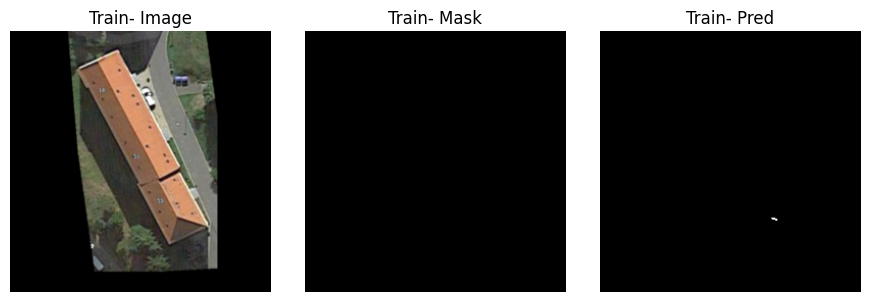

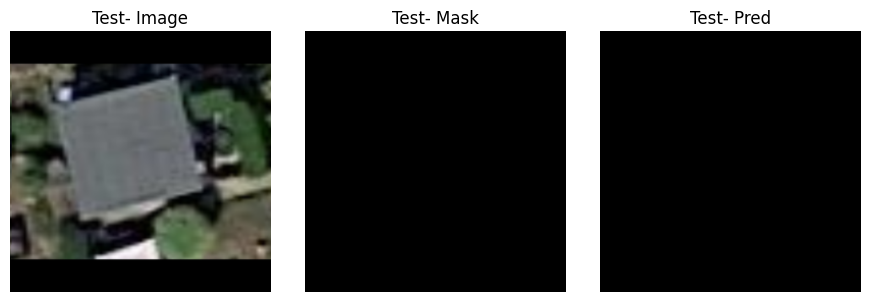

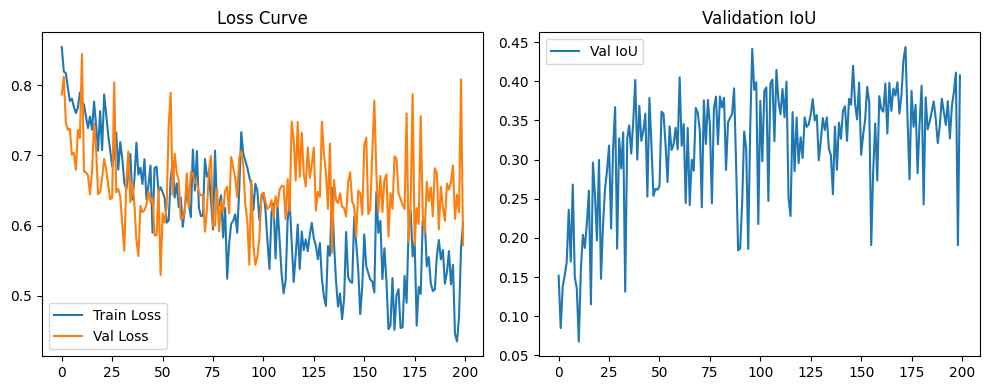

In [ ]:
# U-Net with pretrained ResNet34 encoder for roof segmentation
# Requires: pip install segmentation-models-pytorch

import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.transforms import functional as TF, InterpolationMode
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp

# Reproducibility & Device
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Toggle between roof segmentation and obstruction detection
FINE_MODE = True

# Constants
TARGET_SIZE = (256, 256)
BATCH_SIZE = 4
NUM_EPOCHS = 200
PATIENCE = 150

# Helper: pad image to square
def pad_to_square_pil(img, fill=0):
    w, h = img.size
    m = max(w, h)
    pad_left = (m - w) // 2
    pad_top = (m - h) // 2
    pad_right = m - w - pad_left
    pad_bottom = m - h - pad_top
    return TF.pad(img, (pad_left, pad_top, pad_right, pad_bottom), fill=fill)

# Dataset class
class RoofDataset(Dataset):
    def __init__(self, folders, augment=False, fine_features=False):
        self.folders = folders
        self.augment = augment
        self.fine_features = fine_features
        self.label_mapping = {
            '_background_': 'background', 'roof': 'roof',
            'roofline': 'roof_line', 'roof line': 'roof_line',
            'vent': 'vent', 'vents': 'vent', "vents'": 'vent',
            'window': 'window', 'chimney': 'chimney',
            'bend': 'bend', 'wall': 'wall'
        }
        self.roof_labels = {'roof', 'roof_line', 'chimney', 'vent', 'bend'}
        self.fine_labels = {'chimney', 'vent', "vents", "vents'", 'bend'}
        self.jitter = transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25)

    def normalize_labels(self, labels):
        return [self.label_mapping.get(lbl.strip().lower(), 'other') for lbl in labels]

    def _augment_pair(self, img, msk):
        if random.random() < 0.5:
            img, msk = TF.hflip(img), TF.hflip(msk)
        if random.random() < 0.5:
            img, msk = TF.vflip(img), TF.vflip(msk)
        angle = random.uniform(-15, 15)
        img = TF.rotate(img, angle, interpolation=InterpolationMode.BILINEAR)
        msk = TF.rotate(msk, angle, interpolation=InterpolationMode.NEAREST)
        scale = random.uniform(0.9, 1.1)
        shear = random.uniform(-5, 5)
        tx = int(0.10 * img.width * random.uniform(-1, 1))
        ty = int(0.10 * img.height * random.uniform(-1, 1))
        img = TF.affine(img, 0, (tx, ty), scale, shear, InterpolationMode.BILINEAR, fill=0)
        msk = TF.affine(msk, 0, (tx, ty), scale, shear, InterpolationMode.NEAREST, fill=0)
        if random.random() < 0.3:
            img = TF.gaussian_blur(img, kernel_size=3)
        if random.random() < 0.3:
            arr = np.array(img)
            noise = np.random.normal(0, 5, arr.shape).astype(np.int16)
            arr = np.clip(arr.astype(np.int16) + noise, 0, 255).astype(np.uint8)
            img = Image.fromarray(arr)
        img = self.jitter(img)
        return img, msk

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        folder = self.folders[idx]
        img = Image.open(os.path.join(folder, 'img.png')).convert('RGB')
        msk = Image.open(os.path.join(folder, 'label.png')).convert('L')
        labels_file = os.path.join(folder, 'label_names.txt')
        labels = self.normalize_labels(open(labels_file).read().splitlines()) if os.path.exists(labels_file) else ['background']
        is_roof = any(lbl in self.roof_labels for lbl in labels)
        if self.augment:
            img, msk = self._augment_pair(img, msk)
        img = pad_to_square_pil(img, fill=0)
        msk = pad_to_square_pil(msk, fill=0)
        img = TF.resize(img, TARGET_SIZE, interpolation=InterpolationMode.BILINEAR)
        msk = TF.resize(msk, TARGET_SIZE, interpolation=InterpolationMode.NEAREST)
        img = TF.to_tensor(img)
        msk = TF.to_tensor(msk)
        if self.fine_features:
            is_fine = any(lbl in self.fine_labels for lbl in labels)
            msk = ((msk > 0.05) & (msk < 0.2)).float() if is_fine else torch.zeros_like(msk)
        else:
            msk = (msk > 0.1).float() if is_roof else torch.zeros_like(msk)
        return img, msk

@torch.no_grad()
def compute_iou(pred, targ, thresh=0.5):
    pred = (pred > thresh).float()
    inter = (pred * targ).sum((1,2,3))
    union = ((pred + targ) >= 1).float().sum((1,2,3))
    return ((inter + 1e-6) / (union + 1e-6)).mean().item()

# Paths
root_dir = "./dataset/New folder (4)"
all_folders = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]
random.shuffle(all_folders)
n = len(all_folders)
train_f, val_f, test_f = np.split(all_folders, [int(.7*n), int(.85*n)])

train_ds = RoofDataset(train_f, augment=True, fine_features=FINE_MODE)
val_ds = RoofDataset(val_f, augment=False, fine_features=FINE_MODE)
test_ds = RoofDataset(test_f, augment=False, fine_features=FINE_MODE)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# Model and training setup
model = smp.Unet("resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation="sigmoid").to(device)

class FocalTverskyLoss(nn.Module):
    def __init__(self, alpha=0.3, beta=0.7, gamma=0.75, smooth=1e-6):
        super(FocalTverskyLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.smooth = smooth

    def forward(self, preds, targets):
        preds = preds.view(-1)
        targets = targets.view(-1)

        tp = (preds * targets).sum()
        fp = ((1 - targets) * preds).sum()
        fn = (targets * (1 - preds)).sum()

        tversky = (tp + self.smooth) / (tp + self.alpha * fp + self.beta * fn + self.smooth)
        focal_tversky = (1 - tversky) ** self.gamma

        return focal_tversky

loss_fn = FocalTverskyLoss(alpha=0.3, beta=0.7, gamma=0.75)
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

best_iou = 0.0
epochs_no_improve = 0
history = {'train_loss': [], 'val_loss': [], 'val_iou': []}
start_epoch = 1

# Checkpoint resume logic
checkpoint_path = 'checkpoint_fine_new.pth' if FINE_MODE else 'checkpoint.pth'
model_path = 'best_model_fine.pth' if FINE_MODE else 'best_model.pth'
if os.path.exists(checkpoint_path):
    try:
        checkpoint = torch.load(checkpoint_path, weights_only=False)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        best_iou = checkpoint['best_iou']
        history = checkpoint['history']
        start_epoch = checkpoint['epoch'] + 1
        print(f"Resuming training from epoch {start_epoch}")
    except Exception as e:
        print(f"Failed to load checkpoint. Starting fresh. Reason: {e}")

# Training loop
for epoch in range(start_epoch, NUM_EPOCHS+1):
    model.train()
    tloss = 0
    for imgs, masks in train_loader:
        imgs, masks = imgs.to(device), masks.to(device)
        preds = model(imgs)
        loss = loss_fn(preds, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
    tloss /= len(train_loader)

    model.eval()
    vloss, ious = 0, []
    with torch.no_grad():
        for imgs, masks in val_loader:
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            vloss += loss_fn(preds, masks).item()
            ious.append(compute_iou(preds, masks))
    vloss /= len(val_loader)
    viou = np.mean(ious)
    scheduler.step(vloss)

    history['train_loss'].append(tloss)
    history['val_loss'].append(vloss)
    history['val_iou'].append(viou)

    print(f"Epoch {epoch:03d} | Train Loss: {tloss:.4f} | Val Loss: {vloss:.4f} | Val IoU: {viou:.4f}")

    if viou > best_iou + 1e-4:
        best_iou = viou
        epochs_no_improve = 0
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_iou': best_iou,
            'history': history
        }, checkpoint_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print(f"Early stopping at epoch {epoch}. Best IoU: {best_iou:.4f}")
            break

# Evaluate on train and test sets
# Evaluate on train and test sets only if model exists
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()
else:
    print(f"Model file '{model_path}' not found. Evaluation skipped.")


def evaluate(loader, name):
    ious = []
    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            ious.append(compute_iou(preds, masks))
    print(f"{name} IoU: {np.mean(ious):.4f}")

evaluate(train_loader, 'Train')
evaluate(test_loader, 'Test')

# Show sample predictions
def show_sample(loader, title):
    imgs, masks = next(iter(loader))
    imgs, masks = imgs.to(device), masks.to(device)
    with torch.no_grad(): preds = model(imgs)
    img  = imgs[0].cpu().permute(1,2,0)
    msk  = masks[0,0].cpu()
    prd  = (preds[0,0] > 0.5).float().cpu()
    plt.figure(figsize=(9,3))
    for i, (src, lbl) in enumerate(zip([img, msk, prd], ['Image', 'Mask', 'Pred'])):
        plt.subplot(1,3,i+1)
        plt.imshow(src, cmap='gray' if i>0 else None)
        plt.title(f"{title} {lbl}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample(train_loader, 'Train-')
show_sample(test_loader,  'Test-')

# Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'],   label='Val Loss')
plt.legend(); plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['val_iou'], label='Val IoU')
plt.legend(); plt.title('Validation IoU')
plt.tight_layout(); plt.show()

In [ ]:
obstruction_labels = {'chimney', 'vent', "vents", "vents'", 'bend'}
obstruction_folders = []

for folder in all_folders:
    label_path = os.path.join(folder, "label_names.txt")
    if os.path.exists(label_path):
        labels = open(label_path).read().lower()
        if any(obs in labels for obs in obstruction_labels):
            obstruction_folders.append(folder)

print(f"Found {len(obstruction_folders)} obstruction-labeled images.")
print("Examples:", obstruction_folders[:10])

Found 144 obstruction-labeled images.
Examples: ['./dataset/New folder (4)/img44_json', './dataset/New folder (4)/51_46735261868884, 12_683718902254835_json', './dataset/New folder (4)/50_3772738675471, 12_056893063315862_json', './dataset/New folder (4)/img40_json', './dataset/New folder (4)/51_764225034591284, 14_3387371517382_json', './dataset/New folder (4)/50_379385546419535, 12_061522745389382_json', './dataset/New folder (4)/50_58713734223487, 12_707494052927528_json', './dataset/New folder (4)/51_73052724700046, 11_517983730063662_json', './dataset/New folder (4)/img69_json', './dataset/New folder (4)/51_78203288368784, 14_339344478937027_json']


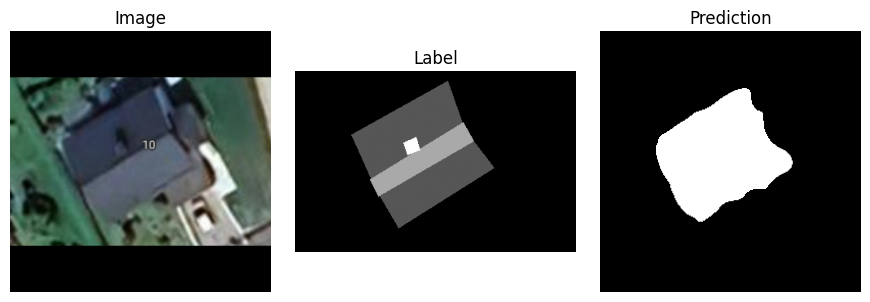

In [ ]:
folder = obstruction_folders[2]  # or pick another index
img_path = os.path.join(folder, "img.png")
label_path = os.path.join(folder, "label.png")

from PIL import Image
img = Image.open(img_path).convert('RGB')
label = Image.open(label_path).convert('L')

# Preprocess to match your model input
img = pad_to_square_pil(img)
img = TF.resize(img, TARGET_SIZE)
img_tensor = TF.to_tensor(img).unsqueeze(0).to(device)

# Predict obstruction mask
model.eval()
with torch.no_grad():
    pred_mask = model(img_tensor)

# Visualize
plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Image"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(label, cmap='gray'); plt.title("Label"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow((pred_mask[0,0].cpu() > 0.5).float(), cmap='gray'); plt.title("Prediction"); plt.axis('off')
plt.tight_layout(); plt.show()

In [ ]:
folder = obstruction_folders[3]  # or choose your example
label = Image.open(os.path.join(folder, 'label.png')).convert('L')
label_tensor = TF.to_tensor(label)

# Check unique pixel values
unique_vals = torch.unique(label_tensor)
print("Unique pixel values in label:", unique_vals)

Unique pixel values in label: tensor([0.0000, 0.1490, 0.2941, 0.4431])


## Stage 3: Usable Roof Area Estimation

This stage combines the outputs of two trained models to calculate the **solar-suitable rooftop area**.

### Inputs:
- **Roof mask** → from the Stage 1 model (full roof area)
- **Obstruction mask** → from the Stage 2 model (chimneys, vents, bends)

### Method:
- Create binary masks:
  - `roof_mask = (roof_pred > 0.5)`
  - `obs_mask  = (obs_pred > 0.5)`
- Subtract the obstructions from the full roof:
  ```python
  usable_mask = roof_mask * (1 - obs_mask)

In [ ]:
import torch
import segmentation_models_pytorch as smp

# Roof model
roof_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to('cuda')
checkpoint = torch.load("checkpoint_256.pth", weights_only=False)
roof_model.load_state_dict(checkpoint['model_state_dict'])
torch.save(roof_model.state_dict(), "best_model.pth")

# Obstruction model
obstruction_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to('cuda')
checkpoint = torch.load("checkpoint_fine_new.pth", weights_only=False)
obstruction_model.load_state_dict(checkpoint['model_state_dict'])
torch.save(obstruction_model.state_dict(), "best_model_fine.pth")

print("Both models saved as best_model.pth and best_model_fine.pth.")

✅ Both models saved as best_model.pth and best_model_fine.pth.


Resuming training from epoch 126
Epoch 126 | Train Loss: 0.7858 | Val Loss: 0.8156 | Val IoU: 0.7550
Epoch 127 | Train Loss: 0.7928 | Val Loss: 0.8221 | Val IoU: 0.7144
Epoch 128 | Train Loss: 0.7940 | Val Loss: 0.8360 | Val IoU: 0.5906
Epoch 129 | Train Loss: 0.7990 | Val Loss: 0.8224 | Val IoU: 0.7194
Epoch 130 | Train Loss: 0.7869 | Val Loss: 0.8179 | Val IoU: 0.7433
Epoch 131 | Train Loss: 0.7861 | Val Loss: 0.8175 | Val IoU: 0.7468
Epoch 132 | Train Loss: 0.7860 | Val Loss: 0.8215 | Val IoU: 0.7299
Epoch 133 | Train Loss: 0.7922 | Val Loss: 0.8335 | Val IoU: 0.6431
Epoch 134 | Train Loss: 0.7891 | Val Loss: 0.8237 | Val IoU: 0.7159
Epoch 135 | Train Loss: 0.7848 | Val Loss: 0.8210 | Val IoU: 0.6997
Epoch 136 | Train Loss: 0.7854 | Val Loss: 0.8186 | Val IoU: 0.7418
Epoch 137 | Train Loss: 0.7822 | Val Loss: 0.8199 | Val IoU: 0.7388
Epoch 138 | Train Loss: 0.7868 | Val Loss: 0.8196 | Val IoU: 0.7231
Epoch 139 | Train Loss: 0.7863 | Val Loss: 0.8139 | Val IoU: 0.7590
Epoch 140 | Tra

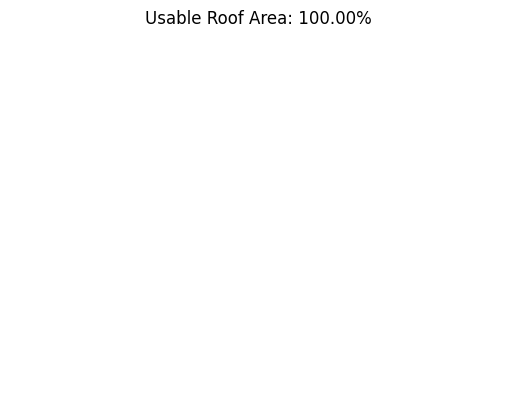

IndexError: boolean index did not match indexed array along axis 0; size of axis is 256 but size of corresponding boolean axis is 1

In [ ]:
# U-Net with pretrained ResNet34 encoder for roof segmentation
# Requires: pip install segmentation-models-pytorch

import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.transforms import functional as TF, InterpolationMode
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp

# Reproducibility & Device
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Toggle between roof segmentation and obstruction detection
FINE_MODE = True

# Constants
TARGET_SIZE = (256, 256)
BATCH_SIZE = 4
NUM_EPOCHS = 200
PATIENCE = 50

# Helper: pad image to square
def pad_to_square_pil(img, fill=0):
    w, h = img.size
    m = max(w, h)
    pad_left = (m - w) // 2
    pad_top = (m - h) // 2
    pad_right = m - w - pad_left
    pad_bottom = m - h - pad_top
    return TF.pad(img, (pad_left, pad_top, pad_right, pad_bottom), fill=fill)

# Dataset class
class RoofDataset(Dataset):
    def __init__(self, folders, augment=False, fine_features=False):
        self.folders = folders
        self.augment = augment
        self.fine_features = fine_features
        self.label_mapping = {
            '_background_': 'background', 'roof': 'roof',
            'roofline': 'roof_line', 'roof line': 'roof_line',
            'vent': 'vent', 'vents': 'vent', "vents'": 'vent',
            'window': 'window', 'chimney': 'chimney',
            'bend': 'bend', 'wall': 'wall'
        }
        self.roof_labels = {'roof', 'roof_line', 'chimney', 'vent', 'bend'}
        self.fine_labels = {'chimney', 'vent', "vents", "vents'", 'bend'}
        self.jitter = transforms.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25)

    def normalize_labels(self, labels):
        return [self.label_mapping.get(lbl.strip().lower(), 'other') for lbl in labels]

    def _augment_pair(self, img, msk):
        if random.random() < 0.5:
            img, msk = TF.hflip(img), TF.hflip(msk)
        if random.random() < 0.5:
            img, msk = TF.vflip(img), TF.vflip(msk)
        angle = random.uniform(-15, 15)
        img = TF.rotate(img, angle, interpolation=InterpolationMode.BILINEAR)
        msk = TF.rotate(msk, angle, interpolation=InterpolationMode.NEAREST)
        scale = random.uniform(0.9, 1.1)
        shear = random.uniform(-5, 5)
        tx = int(0.10 * img.width * random.uniform(-1, 1))
        ty = int(0.10 * img.height * random.uniform(-1, 1))
        img = TF.affine(img, 0, (tx, ty), scale, shear, InterpolationMode.BILINEAR, fill=0)
        msk = TF.affine(msk, 0, (tx, ty), scale, shear, InterpolationMode.NEAREST, fill=0)
        if random.random() < 0.3:
            img = TF.gaussian_blur(img, kernel_size=3)
        if random.random() < 0.3:
            arr = np.array(img)
            noise = np.random.normal(0, 5, arr.shape).astype(np.int16)
            arr = np.clip(arr.astype(np.int16) + noise, 0, 255).astype(np.uint8)
            img = Image.fromarray(arr)
        img = self.jitter(img)
        return img, msk

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        folder = self.folders[idx]
        img = Image.open(os.path.join(folder, 'img.png')).convert('RGB')
        msk = Image.open(os.path.join(folder, 'label.png')).convert('L')
        labels_file = os.path.join(folder, 'label_names.txt')
        labels = self.normalize_labels(open(labels_file).read().splitlines()) if os.path.exists(labels_file) else ['background']
        is_roof = any(lbl in self.roof_labels for lbl in labels)
        if self.augment:
            img, msk = self._augment_pair(img, msk)
        img = pad_to_square_pil(img, fill=0)
        msk = pad_to_square_pil(msk, fill=0)
        img = TF.resize(img, TARGET_SIZE, interpolation=InterpolationMode.BILINEAR)
        msk = TF.resize(msk, TARGET_SIZE, interpolation=InterpolationMode.NEAREST)
        img = TF.to_tensor(img)
        msk = TF.to_tensor(msk)
        if self.fine_features:
            is_fine = any(lbl in self.fine_labels for lbl in labels)
            msk = (msk > 0.1).float() if is_fine else torch.zeros_like(msk)
        else:
            msk = (msk > 0.1).float() if is_roof else torch.zeros_like(msk)
        return img, msk

@torch.no_grad()
def compute_iou(pred, targ, thresh=0.5):
    pred = (pred > thresh).float()
    inter = (pred * targ).sum((1,2,3))
    union = ((pred + targ) >= 1).float().sum((1,2,3))
    return ((inter + 1e-6) / (union + 1e-6)).mean().item()

# Paths
root_dir = "./dataset/New folder (4)"
all_folders = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]
random.shuffle(all_folders)
n = len(all_folders)
train_f, val_f, test_f = np.split(all_folders, [int(.7*n), int(.85*n)])

train_ds = RoofDataset(train_f, augment=True, fine_features=FINE_MODE)
val_ds = RoofDataset(val_f, augment=False, fine_features=FINE_MODE)
test_ds = RoofDataset(test_f, augment=False, fine_features=FINE_MODE)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# Model and training setup
model = smp.Unet("resnet34", encoder_weights="imagenet", in_channels=3, classes=1, activation="sigmoid").to(device)

class FocalDiceLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.focal = smp.losses.FocalLoss('binary', gamma=2)
        self.dice  = smp.losses.DiceLoss(mode='binary')
    def forward(self, preds, targets):
        return self.focal(preds, targets) + self.dice(preds, targets)

loss_fn = FocalDiceLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

best_iou = 0.0
epochs_no_improve = 0
history = {'train_loss': [], 'val_loss': [], 'val_iou': []}
start_epoch = 1

# Checkpoint resume logic
checkpoint_path = 'checkpoint_fine.pth' if FINE_MODE else 'checkpoint.pth'
model_path = 'best_model_fine.pth' if FINE_MODE else 'best_model.pth'
if os.path.exists(checkpoint_path):
    try:
        checkpoint = torch.load(checkpoint_path, weights_only=False)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        best_iou = checkpoint['best_iou']
        history = checkpoint['history']
        start_epoch = checkpoint['epoch'] + 1
        print(f"Resuming training from epoch {start_epoch}")
    except Exception as e:
        print(f"Failed to load checkpoint. Starting fresh. Reason: {e}")

# Training loop
for epoch in range(start_epoch, NUM_EPOCHS+1):
    model.train()
    tloss = 0
    for imgs, masks in train_loader:
        imgs, masks = imgs.to(device), masks.to(device)
        preds = model(imgs)
        loss = loss_fn(preds, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
    tloss /= len(train_loader)

    model.eval()
    vloss, ious = 0, []
    with torch.no_grad():
        for imgs, masks in val_loader:
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            vloss += loss_fn(preds, masks).item()
            ious.append(compute_iou(preds, masks))
    vloss /= len(val_loader)
    viou = np.mean(ious)
    scheduler.step(vloss)

    history['train_loss'].append(tloss)
    history['val_loss'].append(vloss)
    history['val_iou'].append(viou)

    print(f"Epoch {epoch:03d} | Train Loss: {tloss:.4f} | Val Loss: {vloss:.4f} | Val IoU: {viou:.4f}")

    if viou > best_iou + 1e-4:
        best_iou = viou
        epochs_no_improve = 0
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_iou': best_iou,
            'history': history
        }, checkpoint_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print(f"Early stopping at epoch {epoch}. Best IoU: {best_iou:.4f}")
            break

# =========================
# Stage 3: Usable Area Overlay
# =========================
def calculate_usable_area(roof_mask, obs_mask):
    roof_bin = (roof_mask > 0.5).float()
    obs_bin = (obs_mask > 0.5).float()
    usable_mask = roof_bin * (1 - obs_bin)
    roof_area = roof_bin.sum().item()
    usable_area = usable_mask.sum().item()
    usable_ratio = (usable_area / roof_area) * 100 if roof_area > 0 else 0.0
    return usable_mask, usable_ratio

def show_usable_overlay(img_tensor, roof_mask, obs_mask):
    usable_mask, usable_ratio = calculate_usable_area(roof_mask, obs_mask)

    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    # Ensure image has 3 channels (RGB)
    if img.ndim == 2:
        img = np.stack([img] * 3, axis=-1)
    elif img.ndim == 3 and img.shape[-1] == 1:
        img = np.concatenate([img]*3, axis=-1)
    elif img.ndim != 3 or img.shape[-1] != 3:
        raise ValueError(f"Expected 3-channel image, but got shape {img.shape}")
    if img.ndim == 2:  # grayscale fallback
        img = np.stack([img]*3, axis=-1)

    roof_bin = (roof_mask > 0.5).float().cpu().squeeze().numpy()[0]
    obs_bin = (obs_mask > 0.5).float().cpu().squeeze().numpy()[0]
    usable_bin = usable_mask.cpu().squeeze().numpy()[0]

    overlay = img.copy()
    for c in range(3):
        overlay[..., c][roof_bin == 1] = [0.7, 0.7, 0.7][c]
        overlay[..., c][obs_bin == 1] = [1.0, 0.0, 0.0][c]
        overlay[..., c][usable_bin == 1] = [0.0, 1.0, 0.0][c]

    plt.title(f"Usable Roof Area: {usable_ratio:.2f}%")
    plt.axis('off')
    plt.show()

def run_stage3_overlay(test_loader):
    # Load both models safely
    roof_model_path = 'best_model.pth'
    obs_model_path = 'best_model_fine.pth'

    if not os.path.exists(roof_model_path) or not os.path.exists(obs_model_path):
        print("One or both models not found. Please train both roof and obstruction models.")
        return

    # Load models
    roof_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to(device)
    roof_model.load_state_dict(torch.load(roof_model_path))
    roof_model.eval()

    obstruction_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to(device)
    obstruction_model.load_state_dict(torch.load(obs_model_path))
    obstruction_model.eval()

    # Predict on one sample
    imgs, _ = next(iter(test_loader))
    img = imgs[0].unsqueeze(0).to(device)

    with torch.no_grad():
        roof_pred = roof_model(img)
        obs_pred = obstruction_model(img)

    show_usable_overlay(img[0], roof_pred, obs_pred)

# Run overlay
run_stage3_overlay(test_loader)

# Evaluate on train and test sets

# =========================
# Stage 3: Usable Area Overlay
# =========================
def calculate_usable_area(roof_mask, obs_mask):
    roof_bin = (roof_mask > 0.5).float()
    obs_bin = (obs_mask > 0.5).float()
    usable_mask = roof_bin * (1 - obs_bin)
    roof_area = roof_bin.sum().item()
    usable_area = usable_mask.sum().item()
    usable_ratio = (usable_area / roof_area) * 100 if roof_area > 0 else 0.0
    return usable_mask, usable_ratio

def show_usable_overlay(img_tensor, roof_mask, obs_mask):
    usable_mask, usable_ratio = calculate_usable_area(roof_mask, obs_mask)
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    roof_bin = (roof_mask > 0.5).float().cpu().numpy()[0]
    obs_bin = (obs_mask > 0.5).float().cpu().numpy()[0]
    usable_bin = usable_mask.cpu().numpy()[0]

    overlay = img.copy()
    overlay[roof_bin == 1] = [0.7, 0.7, 0.7]      # Gray = full roof
    overlay[obs_bin == 1] = [1.0, 0.0, 0.0]       # Red = obstructions
    overlay[usable_bin == 1] = [0.0, 1.0, 0.0]    # Green = usable roof

    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.title(f"Usable Roof Area: {usable_ratio:.2f}%")
    plt.axis('off')
    plt.show()

def run_stage3_overlay(test_loader):
    # Load both models safely
    roof_model_path = 'best_model.pth'
    obs_model_path = 'best_model_fine.pth'

    if not os.path.exists(roof_model_path) or not os.path.exists(obs_model_path):
        print("One or both models not found. Please train both roof and obstruction models.")
        return

    # Load models
    roof_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to(device)
    roof_model.load_state_dict(torch.load(roof_model_path))
    roof_model.eval()

    obstruction_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to(device)
    obstruction_model.load_state_dict(torch.load(obs_model_path))
    obstruction_model.eval()

    # Predict on one sample
    imgs, _ = next(iter(test_loader))
    img = imgs[0].unsqueeze(0).to(device)

    with torch.no_grad():
        roof_pred = roof_model(img)
        obs_pred = obstruction_model(img)

    show_usable_overlay(img[0], roof_pred, obs_pred)

# 🔍 Run overlay
run_stage3_overlay(test_loader)

# Stage 3: Usable Roof Area Estimation
# --------------------------------------
def calculate_usable_area(roof_mask, obs_mask):
    roof_bin = (roof_mask > 0.5).float()
    obs_bin = (obs_mask > 0.5).float()
    usable_mask = roof_bin * (1 - obs_bin)
    roof_area = roof_bin.sum().item()
    usable_area = usable_mask.sum().item()
    usable_ratio = (usable_area / roof_area) * 100 if roof_area > 0 else 0.0
    return usable_mask, usable_ratio

def show_usable_overlay(img_tensor, roof_mask, obs_mask):
    usable_mask, usable_ratio = calculate_usable_area(roof_mask, obs_mask)
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    roof_bin = (roof_mask > 0.5).float().cpu().numpy()[0]
    obs_bin = (obs_mask > 0.5).float().cpu().numpy()[0]
    usable_bin = usable_mask.cpu().numpy()[0]

    overlay = img.copy()
    overlay[roof_bin == 1] = [0.7, 0.7, 0.7]      # Gray = roof
    overlay[obs_bin == 1] = [1.0, 0.0, 0.0]       # Red = obstructions
    overlay[usable_bin == 1] = [0.0, 1.0, 0.0]    # Green = usable area

    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.title(f"Usable Roof Area: {usable_ratio:.2f}%")
    plt.axis('off')
    plt.show()

# Example usage with model prediction:
def run_stage3_overlay(test_loader, roof_model, obstruction_model):
    imgs, _ = next(iter(test_loader))
    img = imgs[0].unsqueeze(0).to(device)
    with torch.no_grad():
        roof_pred = roof_model(img)
        obs_pred = obstruction_model(img)
    show_usable_overlay(img[0], roof_pred, obs_pred)

# Load both models for overlay
roof_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to(device)
roof_model.load_state_dict(torch.load('best_model.pth'))
roof_model.eval()

obstruction_model = smp.Unet("resnet34", encoder_weights=None, in_channels=3, classes=1, activation="sigmoid").to(device)
obstruction_model.load_state_dict(torch.load('best_model_fine.pth'))
obstruction_model.eval()
model.load_state_dict(torch.load(model_path))
model.eval()

def evaluate(loader, name):
    ious = []
    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            ious.append(compute_iou(preds, masks))
    print(f"{name} IoU: {np.mean(ious):.4f}")

evaluate(train_loader, 'Train')
evaluate(test_loader, 'Test')

# Show sample predictions
def show_sample(loader, title):
    imgs, masks = next(iter(loader))
    imgs, masks = imgs.to(device), masks.to(device)
    with torch.no_grad(): preds = model(imgs)
    img  = imgs[0].cpu().permute(1,2,0)
    msk  = masks[0,0].cpu()
    prd  = (preds[0,0] > 0.5).float().cpu()
    plt.figure(figsize=(9,3))
    for i, (src, lbl) in enumerate(zip([img, msk, prd], ['Image', 'Mask', 'Pred'])):
        plt.subplot(1,3,i+1)
        plt.imshow(src, cmap='gray' if i>0 else None)
        plt.title(f"{title} {lbl}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample(train_loader, 'Train-')
show_sample(test_loader,  'Test-')

# Overlay function

def overlay_predictions(img_tensor, roof_mask, obs_mask):
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    roof_mask = (roof_mask > 0.5).float().cpu().numpy()[0]
    obs_mask = (obs_mask > 0.5).float().cpu().numpy()[0]

    overlay = img.copy()
    overlay[roof_mask == 1] = [0.0, 1.0, 0.0]  # Green for roof
    overlay[obs_mask == 1] = [1.0, 0.0, 0.0]  # Red for obstruction

    plt.figure(figsize=(6,6))
    plt.imshow(overlay)
    plt.title("Overlay: Roof (Green) + Obstruction (Red)")
    plt.axis('off')
    plt.show()

def show_overlay_sample(loader):
    imgs, _ = next(iter(loader))
    img = imgs[0].unsqueeze(0).to(device)
    with torch.no_grad():
        roof_pred = roof_model(img)
        obs_pred = obstruction_model(img)
    overlay_predictions(img[0], roof_pred, obs_pred)

show_overlay_sample(test_loader)

# Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'],   label='Val Loss')
plt.legend(); plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(history['val_iou'], label='Val IoU')
plt.legend(); plt.title('Validation IoU')
plt.tight_layout(); plt.show()

In [ ]:
def show_usable_overlay(img_tensor, roof_mask, obs_mask):
    usable_mask, usable_ratio = calculate_usable_area(roof_mask, obs_mask)

    # Convert image to numpy (HWC)
    img = img_tensor.cpu().numpy()
    if img.ndim == 3 and img.shape[0] == 3:
        img = np.transpose(img, (1, 2, 0))
    elif img.ndim == 3 and img.shape[0] == 1:
        img = np.transpose(img, (1, 2, 0))
        img = np.repeat(img, 3, axis=2)
    elif img.ndim == 2:
        img = np.stack([img] * 3, axis=-1)
    else:
        raise ValueError(f"Unexpected image shape: {img.shape}")

    # Masks
    roof_bin = (roof_mask > 0.5).float().cpu().squeeze().numpy()
    obs_bin = (obs_mask > 0.5).float().cpu().squeeze().numpy()
    usable_bin = usable_mask.cpu().squeeze().numpy()

    # Image 2: Roof mask overlay only
    roof_only = img.copy()
    for c in range(3):
        roof_only[..., c][roof_bin == 1] = [0.7, 0.7, 0.7][c]

    # Image 3: Overlay with all masks
    overlay = img.copy()
    for c in range(3):
        overlay[..., c][roof_bin == 1] = [0.7, 0.7, 0.7][c]
        overlay[..., c][obs_bin == 1] = [1.0, 0.0, 0.0][c]
        overlay[..., c][usable_bin == 1] = [0.0, 1.0, 0.0][c]

    # Show 3-panel view
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(roof_only)
    axes[1].set_title("Roof Mask Overlay")
    axes[1].axis('off')

    axes[2].imshow(overlay)
    axes[2].set_title(f"Usable Area Overlay: {usable_ratio:.2f}%")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

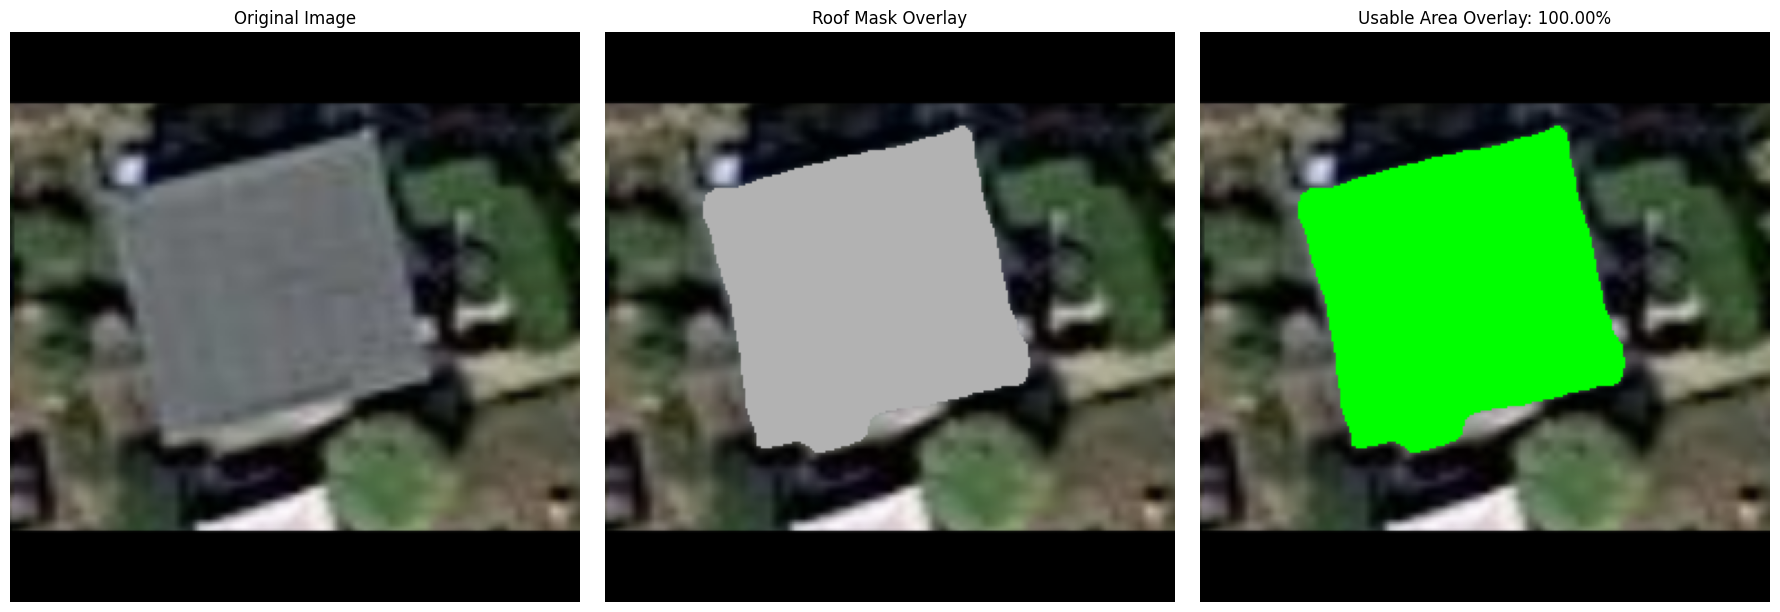

In [ ]:
run_stage3_overlay(test_loader)

In [ ]:
def browse_overlays(loader, num_samples=10):
    count = 0
    for imgs, _ in loader:
        for i in range(min(len(imgs), num_samples - count)):
            img = imgs[i].unsqueeze(0).to(device)

            with torch.no_grad():
                roof_pred = roof_model(img)
                obs_pred = obstruction_model(img)

            show_usable_overlay(img[0], roof_pred, obs_pred)

            count += 1
            if count >= num_samples:
                return

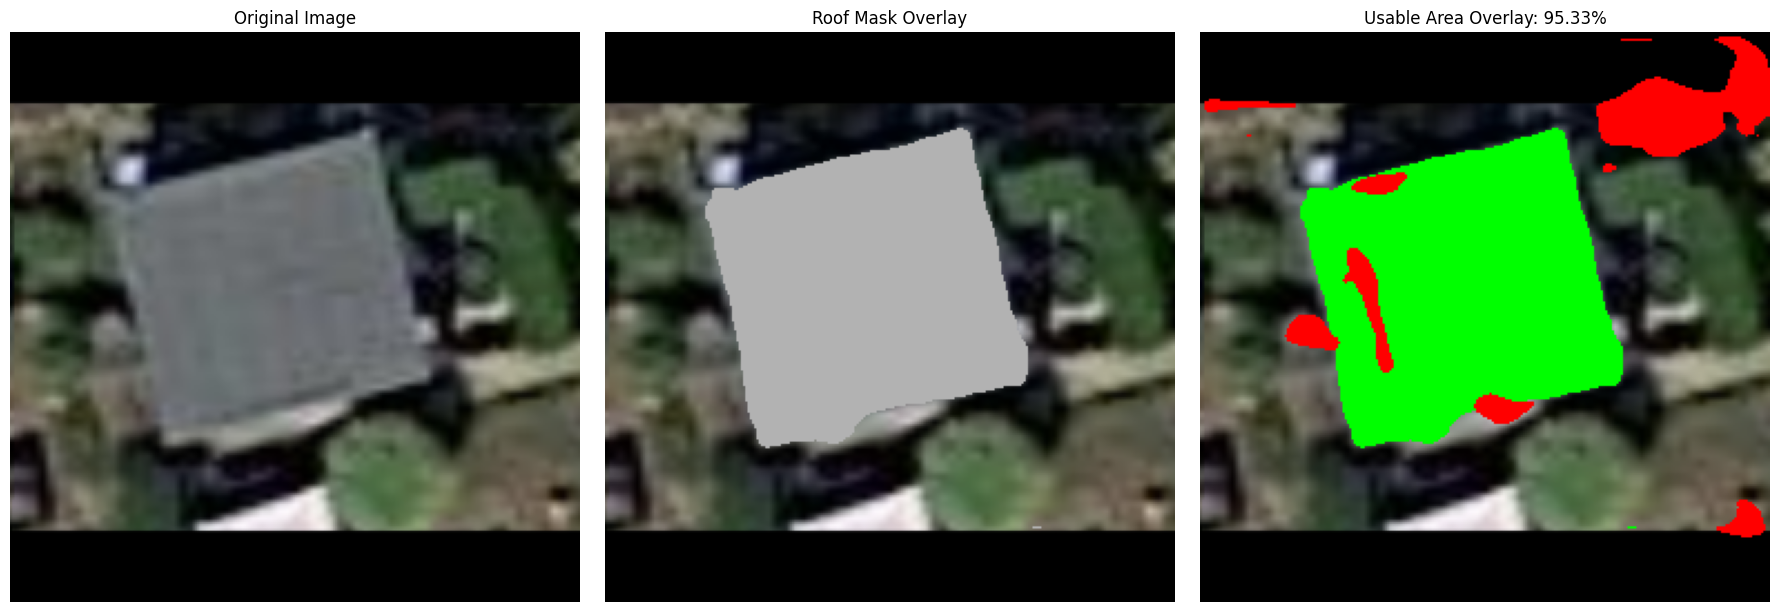

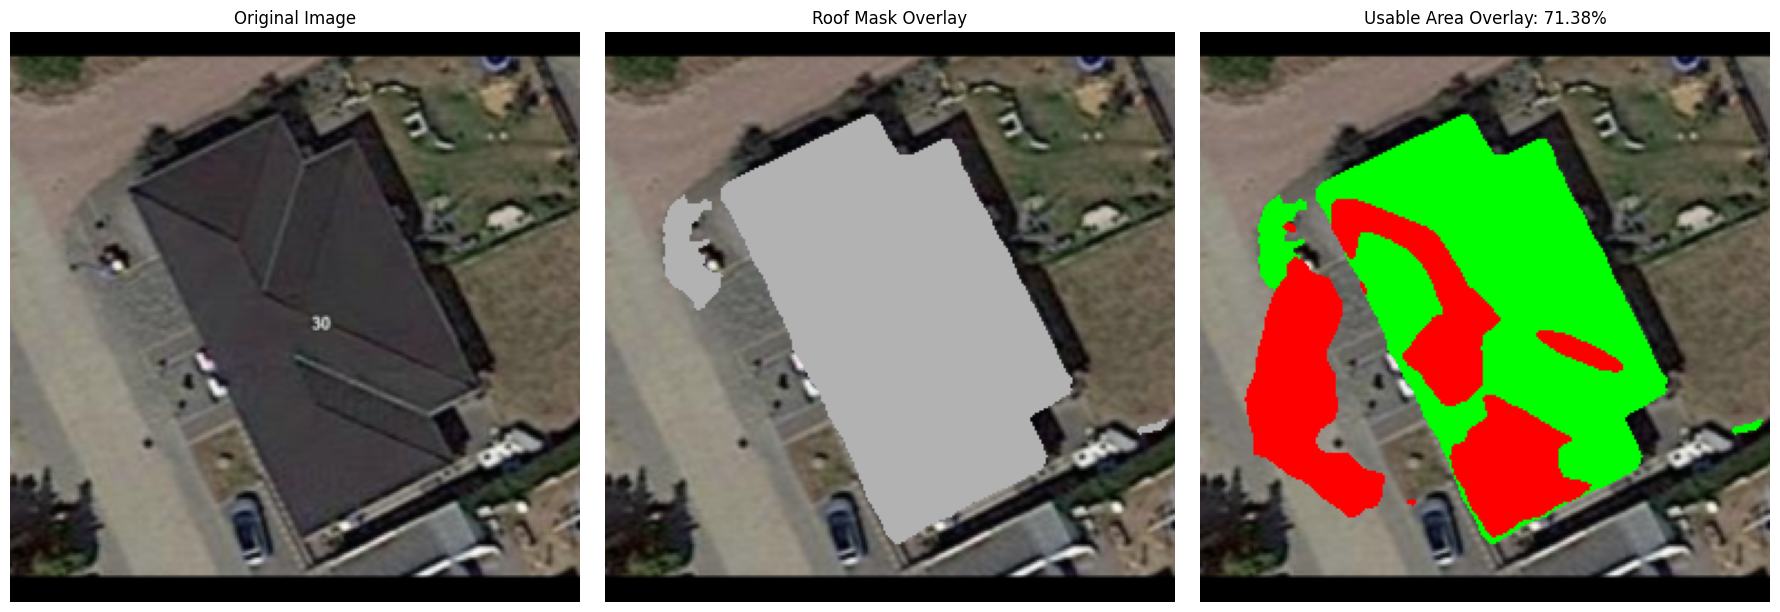

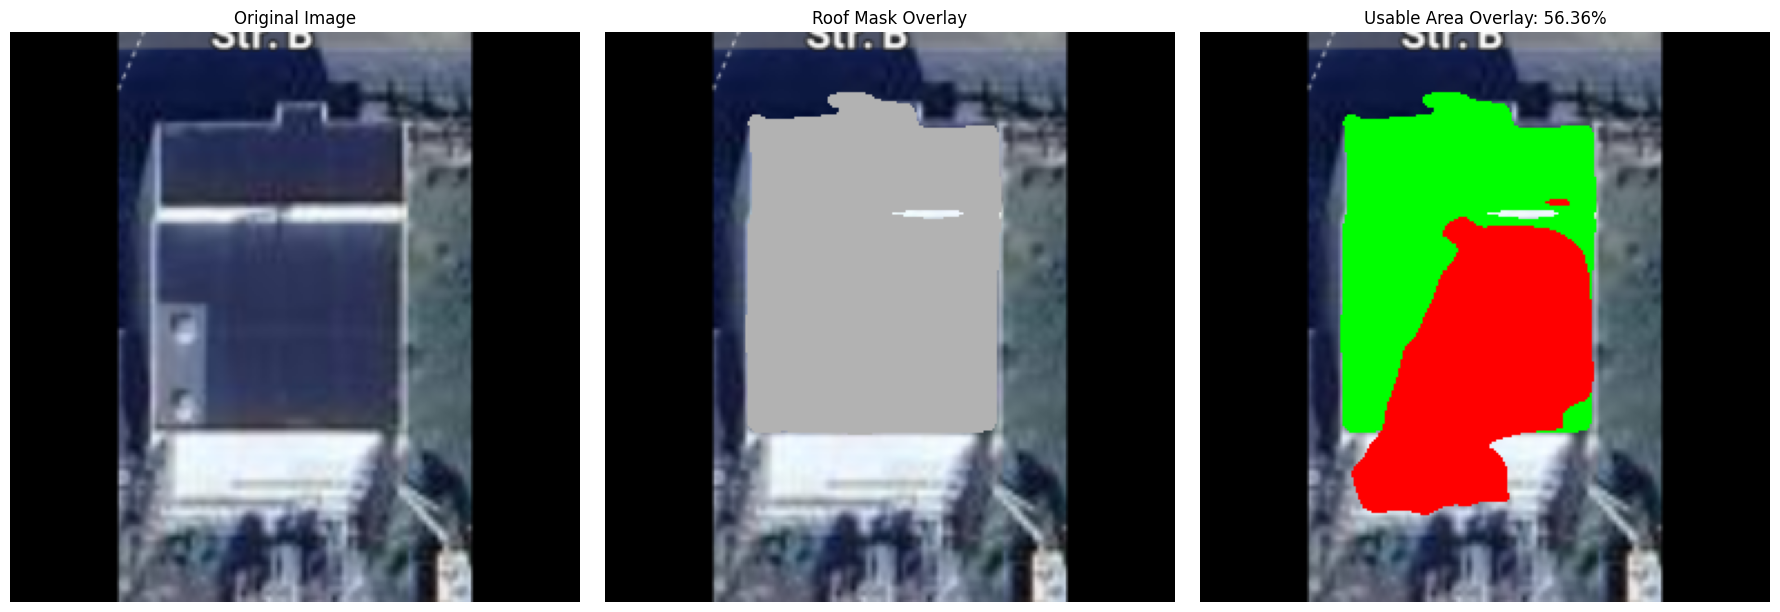

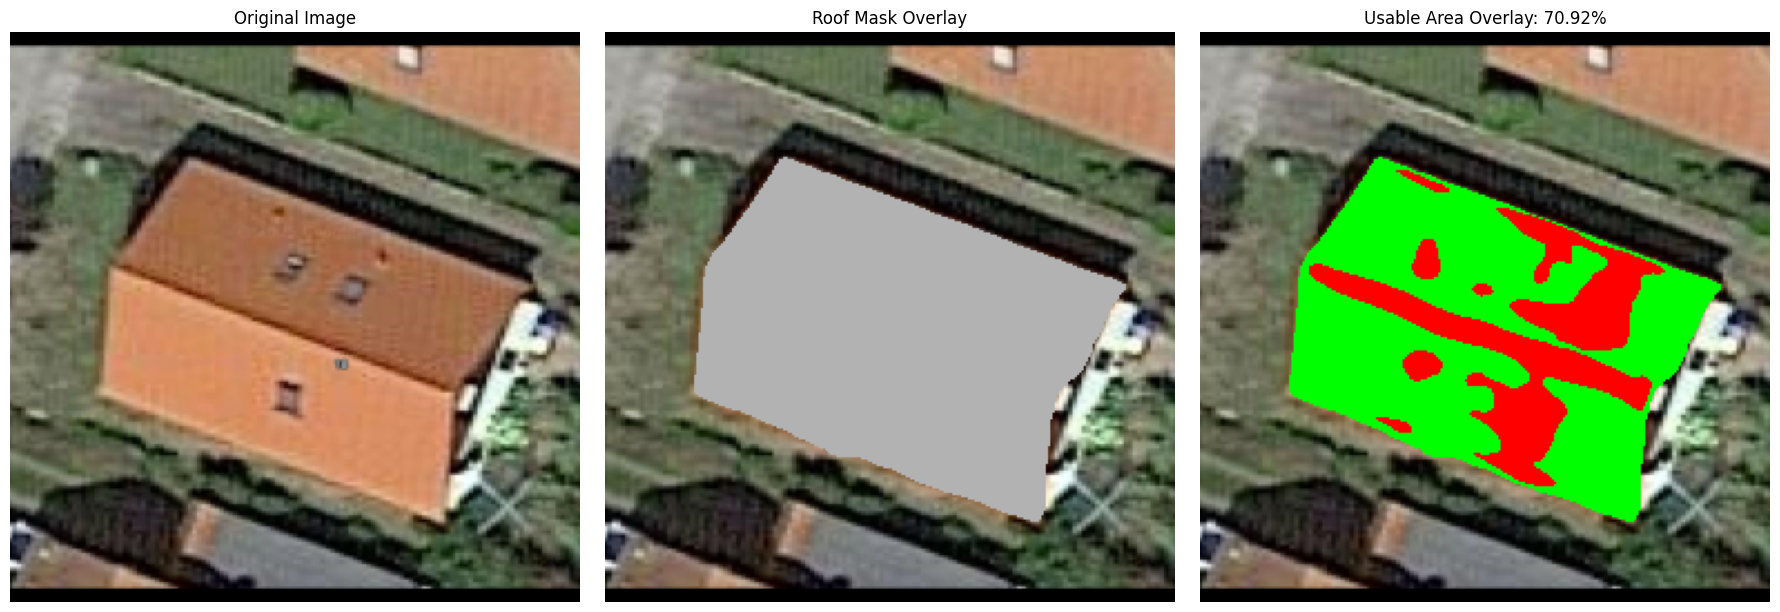

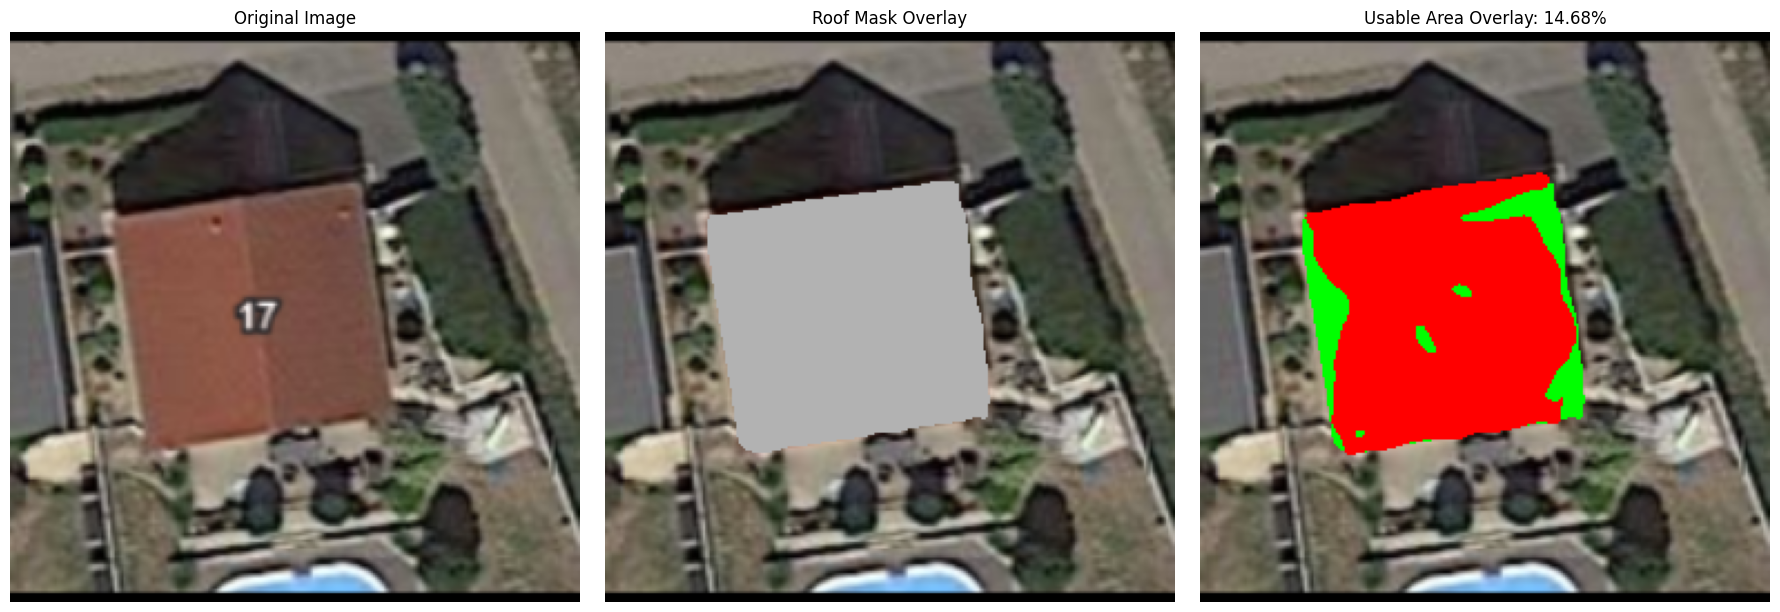

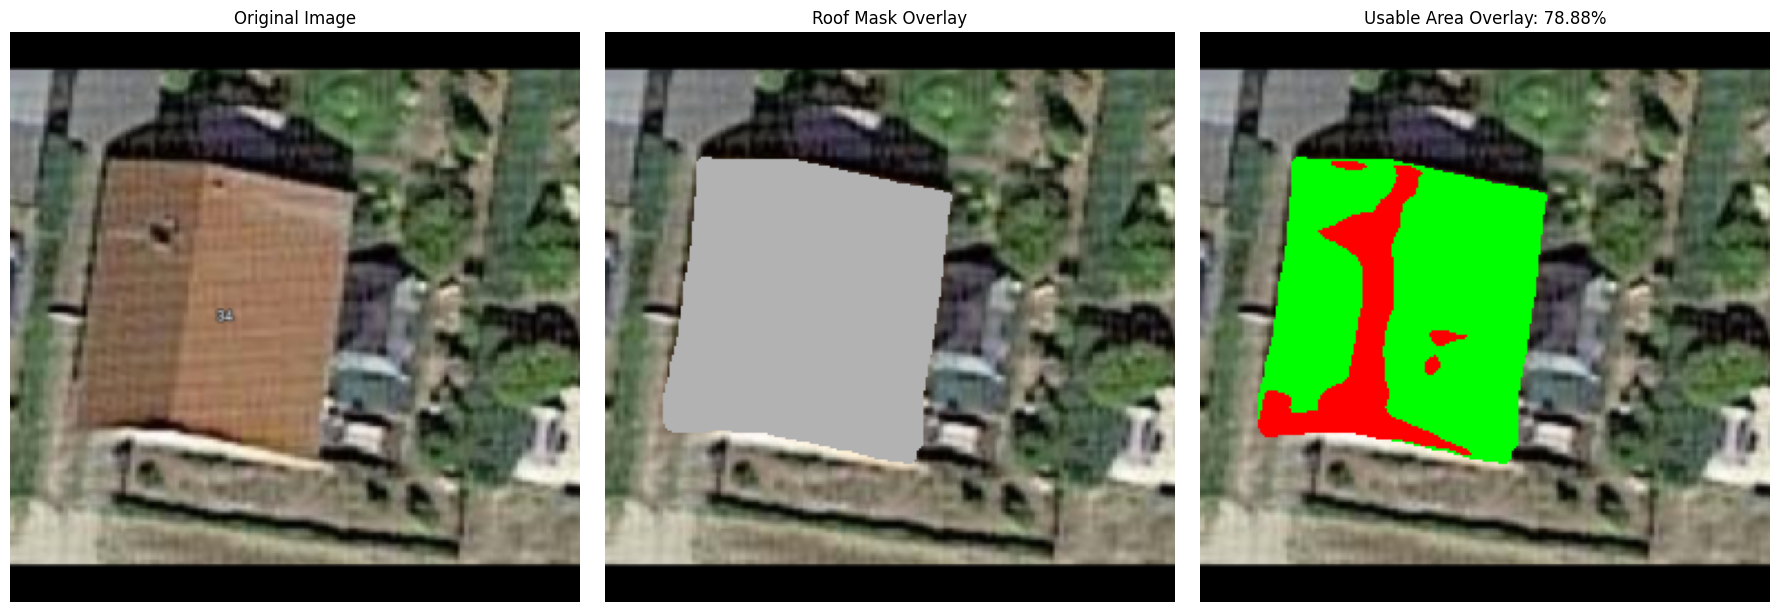

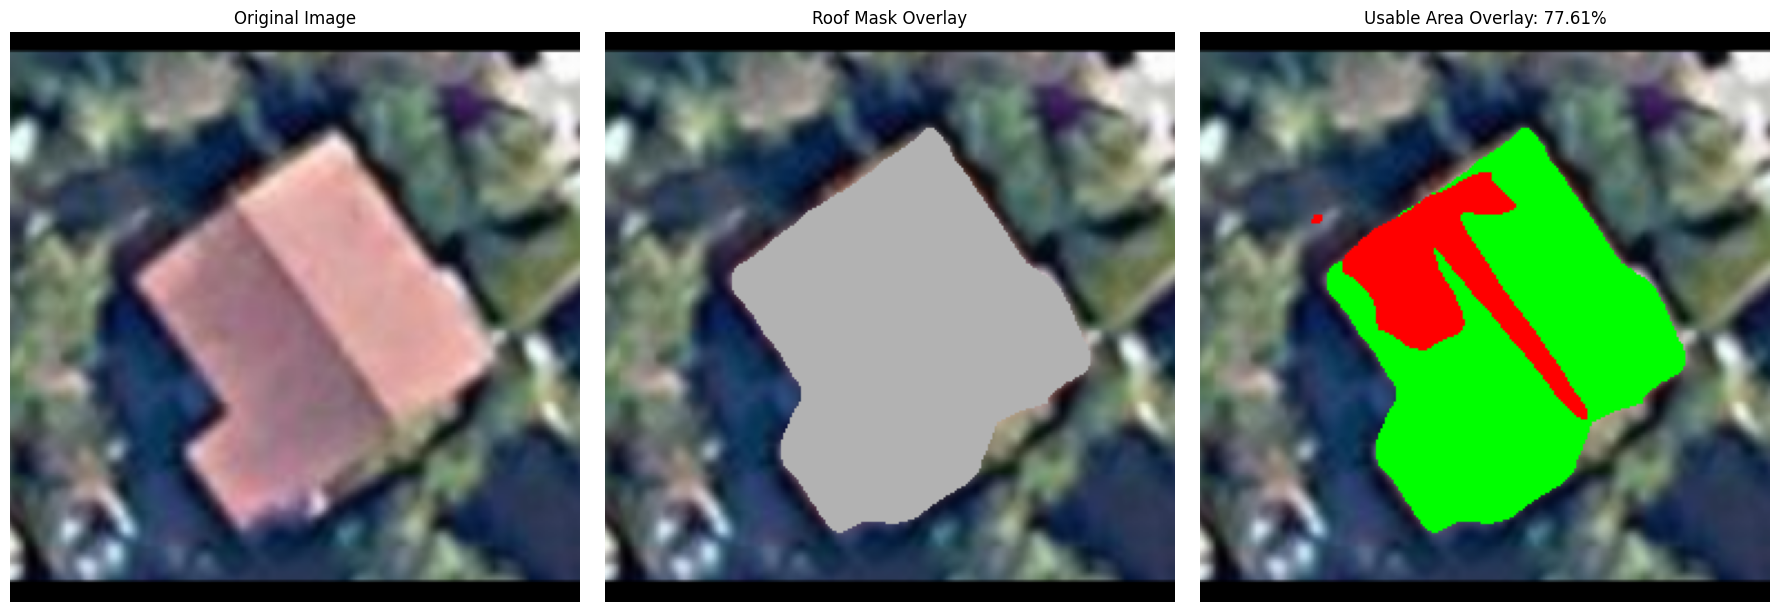

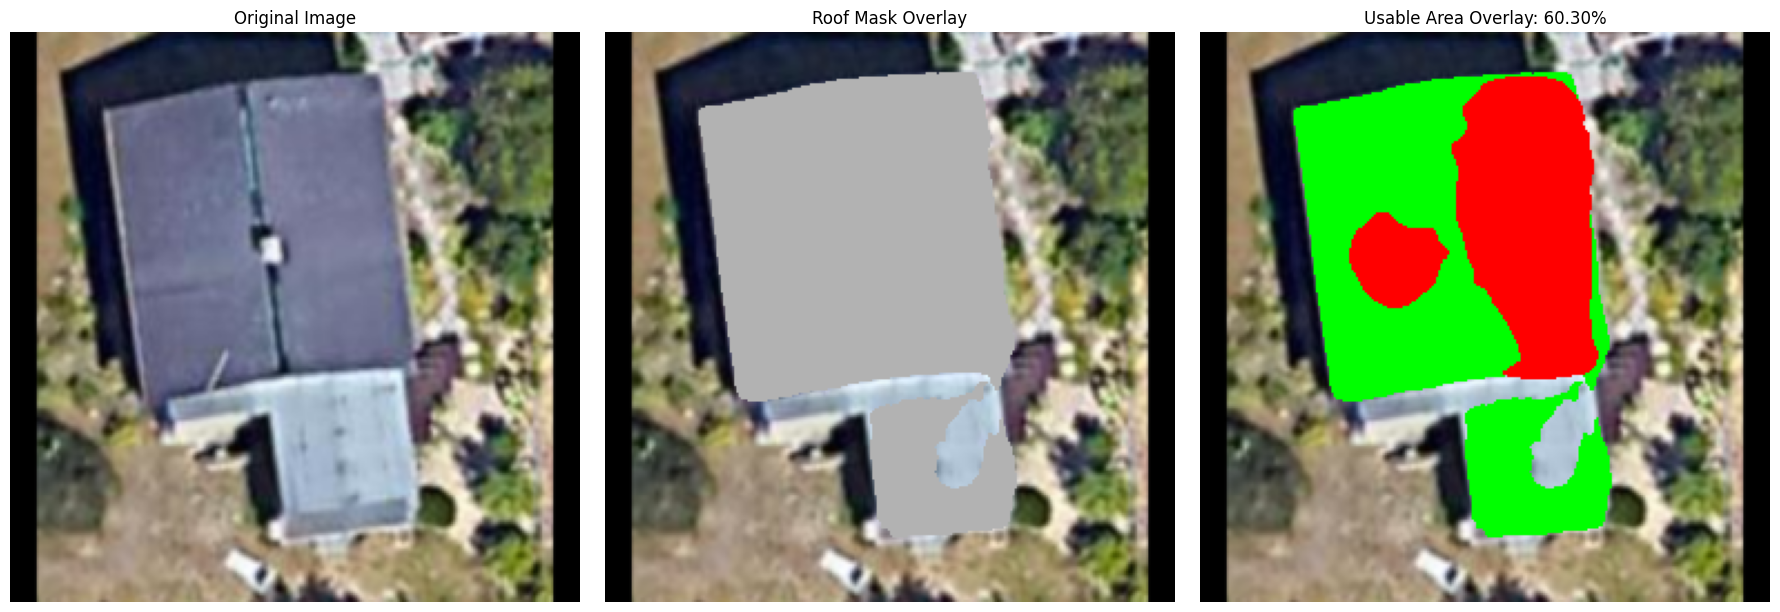

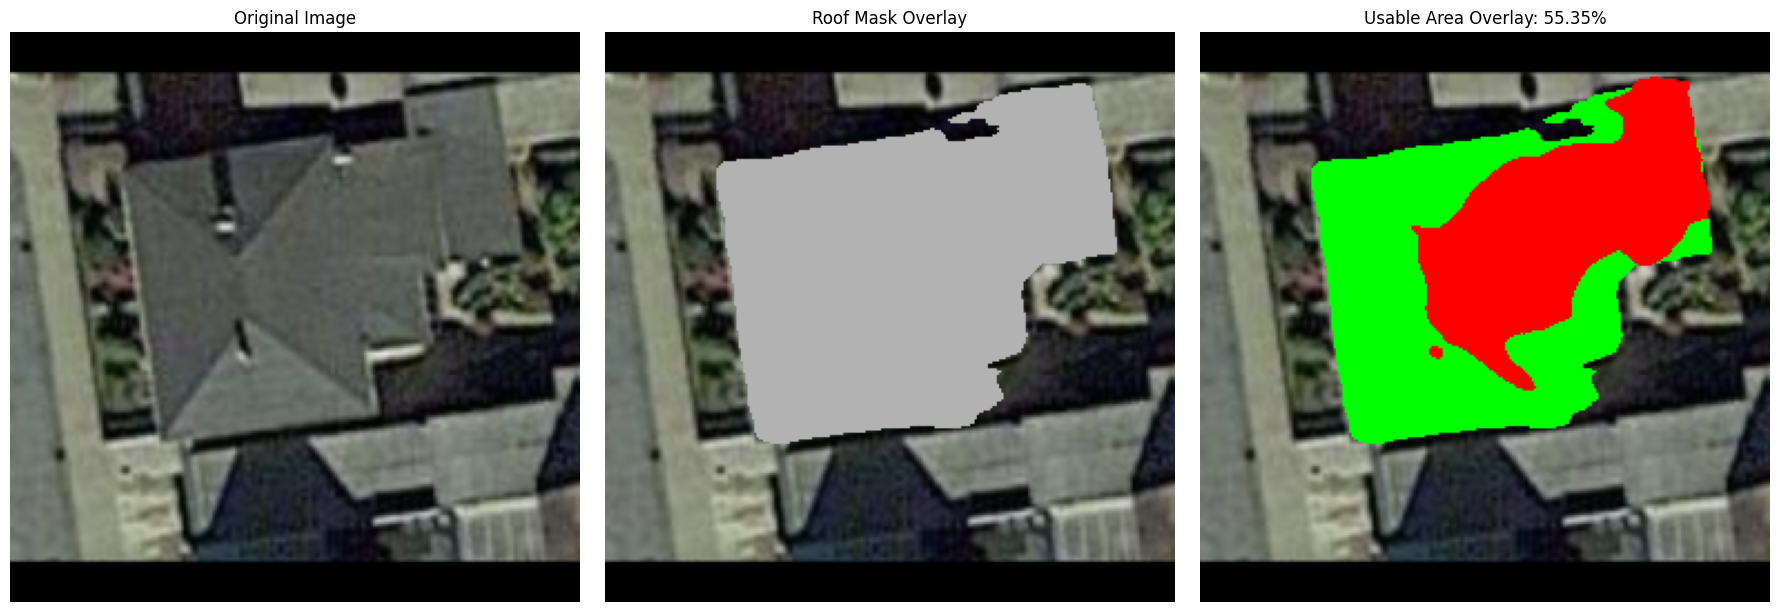

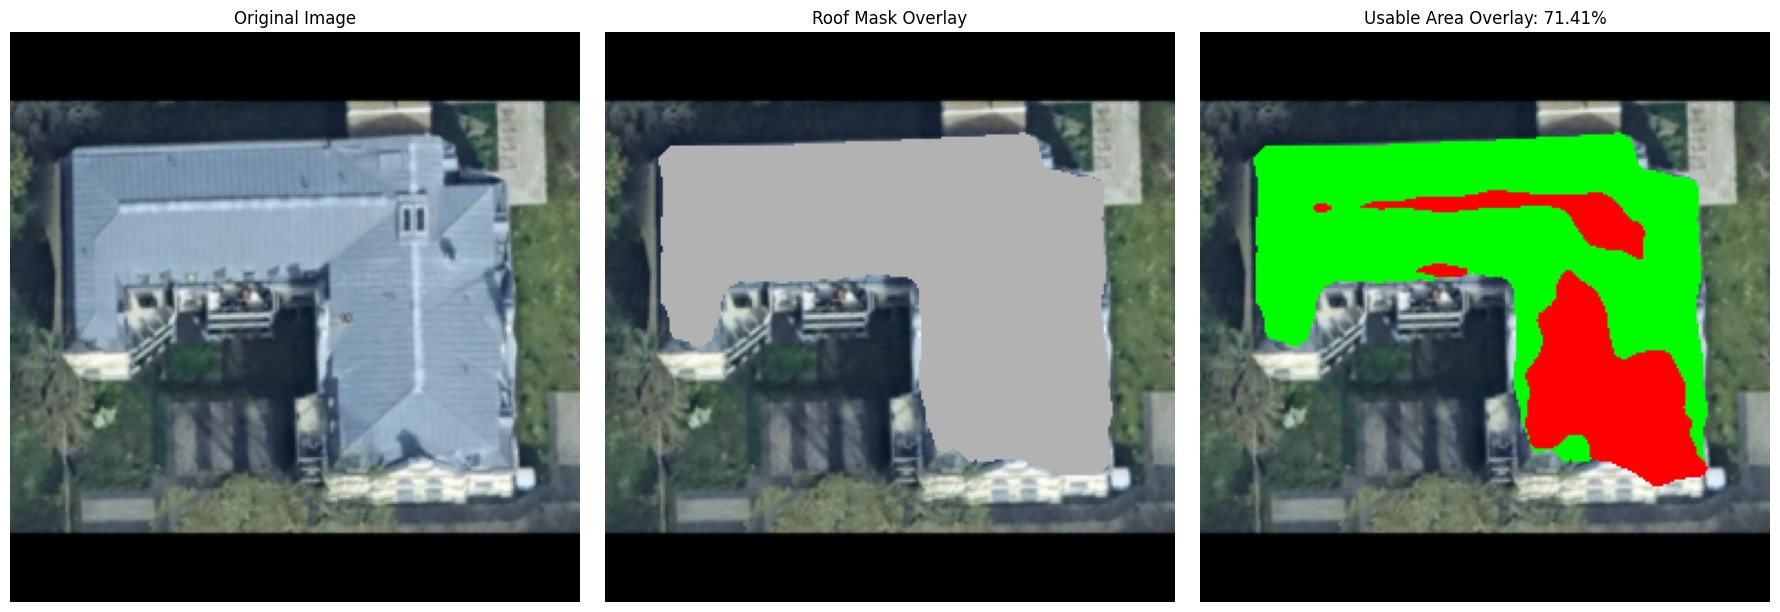

In [ ]:
browse_overlays(test_loader, num_samples=10)